In [11]:
# Imports
from sys import path

path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.explainability.exp_utils import calculate_probas
from src.explainability.exp_utils import create_shap_explainer
from src.explainability.exp_utils import calculate_shap_values
import mlflow
import shap

In [2]:
#loading data

# 1. Charger les quatre fichiers CSV
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

In [3]:
indices = []
idxs = []
for j in range(4):
    for i in range (y_test.shape[0]):
        if (y_test.iloc[i, 0] == j):
            if(len(idxs) < 10):
                idxs.append(i)
            else:
                break
    indices = idxs + indices

print(indices)

[5, 11, 12, 14, 24, 25, 27, 36, 37, 57, 5, 11, 12, 14, 24, 25, 27, 36, 37, 57, 5, 11, 12, 14, 24, 25, 27, 36, 37, 57, 5, 11, 12, 14, 24, 25, 27, 36, 37, 57]


In [4]:
model_path = "../mlruns/644848172247683146/models/m-b0d1297d4f33430bb02bcec4e365c73f/artifacts" 

# Check available models
import glob
available_models = glob.glob("../mlruns/644848172247683146/models/*/artifacts/*.pkl")
print("Available models:")
for model in available_models:
    print(f" - {model}")

model = mlflow.sklearn.load_model(model_path)

print(f"\n Model loaded from: {model_path}")

Available models:
 - ../mlruns/644848172247683146/models\m-0b4c886fda504b2195d37fc2f6a0320d\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-257fda79e9cd477e8c77e0db1b0e092a\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-3edde4cb8ea14d5286fed1b7f467ba7c\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-6e1a5214164c474f91aceb60dfe823ce\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-92e214ac42614226a254a486aa5807f0\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-b0d1297d4f33430bb02bcec4e365c73f\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-b803db1ce5274bd6b2530463b25b42cf\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-e504c5635d5143df86a6c43e37d64fe9\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-f8510aeddd7d416b88b50e1b0dc20da4\artifacts\model.pkl

 Model loaded from: ../mlruns/644848172247683146/models/m-b0d1297d4f33430bb02bcec4e365c73f/artifacts


In [5]:
X_test.head()

,Gender,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption,Age_Group,Continent
0,1,3.3,314.7,7.6,23.2,64,0,5.5,0,1,1,0,1,3
1,0,6.3,596.3,7.6,32.0,63,0,10.8,1,1,1,0,1,1
2,0,2.1,202.0,8.1,25.4,66,0,5.4,0,3,0,0,2,4
3,1,3.4,319.1,7.0,29.4,80,0,4.4,0,4,0,0,2,1
4,1,3.1,297.1,6.4,18.8,71,0,12.0,0,4,0,0,1,4


In [6]:
predict_fn = lambda X: calculate_probas(model, X)[1]

# 1. Création de l'explainer
explainer_shap = create_shap_explainer(
        predict_fn=predict_fn, 
        data=X_train 
    )

# 2. Calcul des valeurs SHAP
shap_values = calculate_shap_values(explainer_shap, X_test.iloc[indices])

PermutationExplainer explainer: 41it [00:41,  1.04s/it]                        


C:\Users\samim\AppData\Local\Temp\ipykernel_15920\3752890335.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


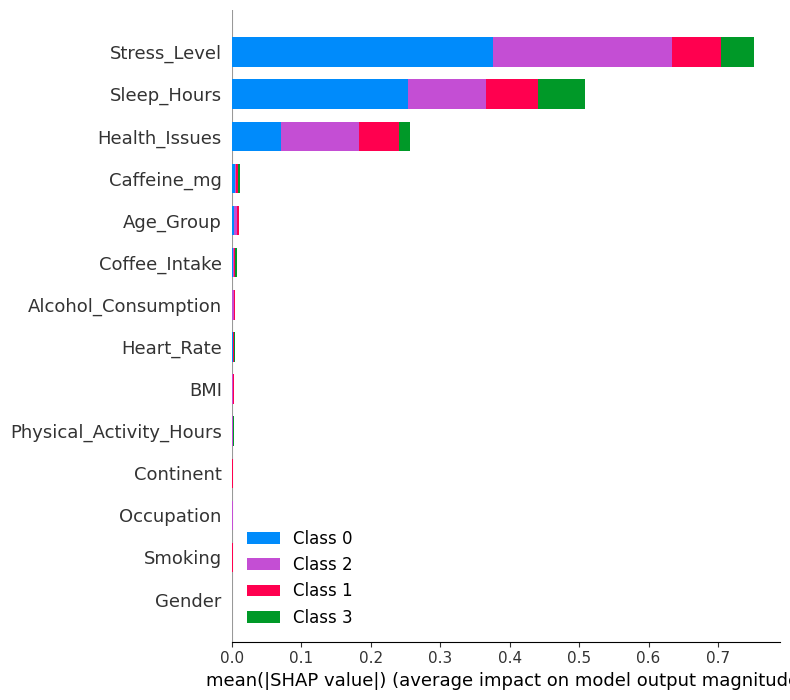

In [7]:

shap.summary_plot(
    shap_values, # On prend toutes les samples, toutes les features, pour la classe 2
    X_test.iloc[indices], 
    show=False # Pour éviter l'affichage dans certaines environnements
)

C:\Users\samim\AppData\Local\Temp\ipykernel_15920\682314111.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


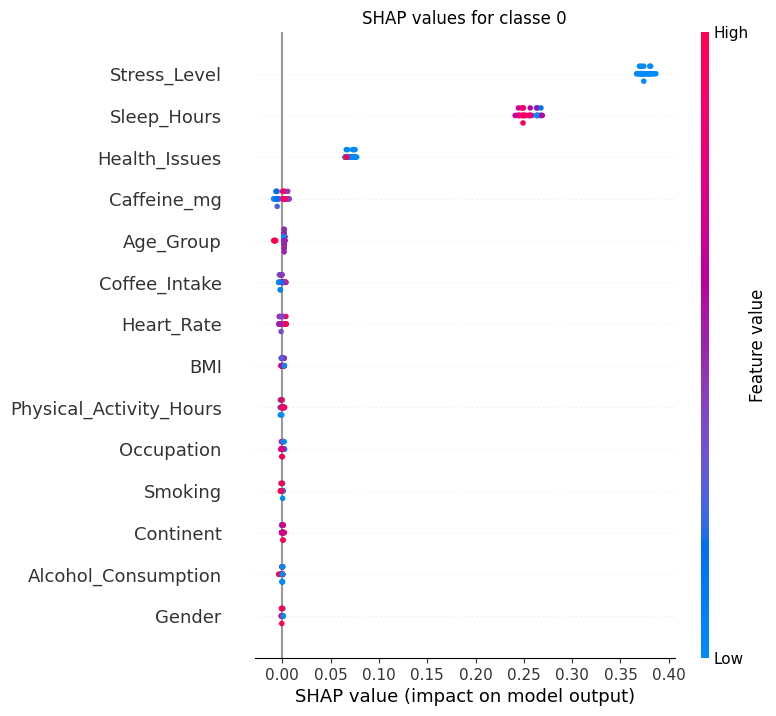

C:\Users\samim\AppData\Local\Temp\ipykernel_15920\682314111.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


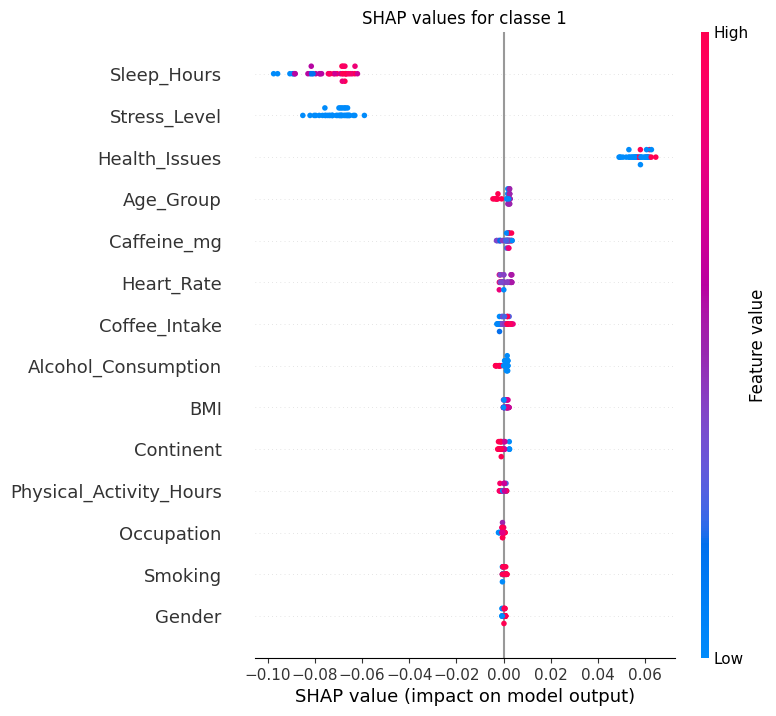

C:\Users\samim\AppData\Local\Temp\ipykernel_15920\682314111.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


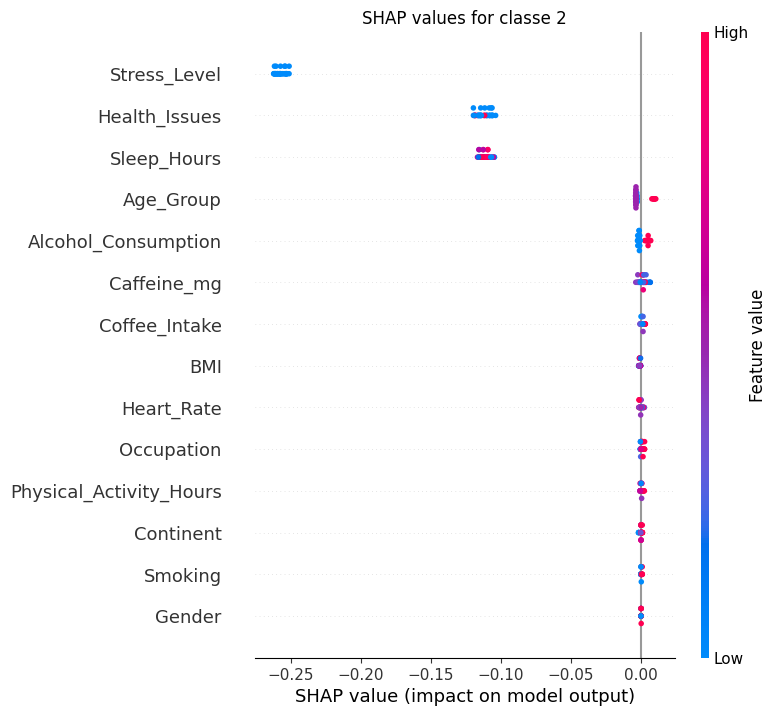

C:\Users\samim\AppData\Local\Temp\ipykernel_15920\682314111.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


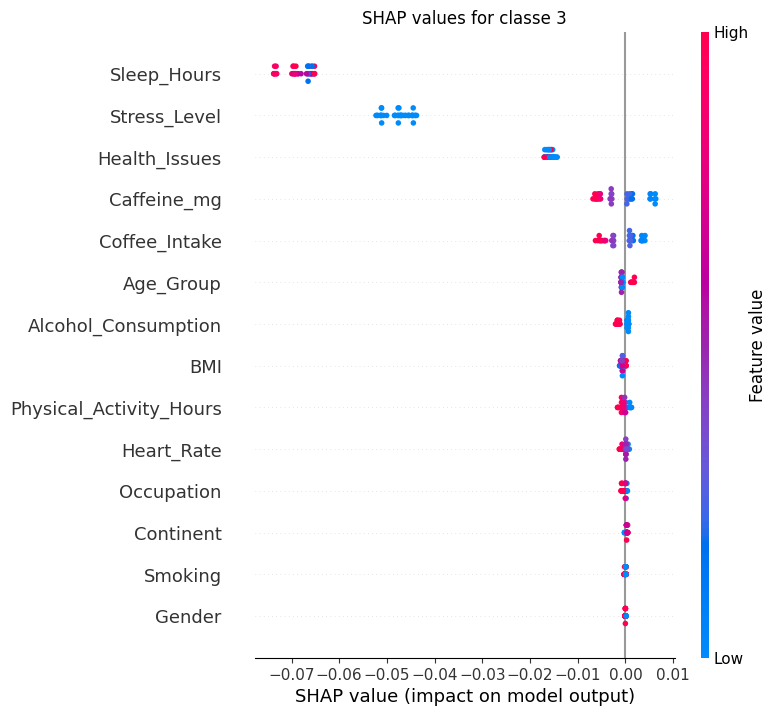

In [8]:

for i in range(4):
    # 1. Utilise shap.summary_plot sans l'argument 'title'
    shap.summary_plot(
        shap_values[:, :, i],
        X_test.iloc[indices],
        show=False # On empêche l'affichage immédiat
    )
    
    # 2. Ajoute le titre en utilisant Matplotlib
    plt.title(f"SHAP values for classe {i}")
    
    # 3. Affiche la figure
    plt.show()

In [9]:
# Imports
from sys import path

path.append('..')

from src.explainability.exp_utils import LimeTabularExplainer
from src.explainability.exp_utils import explain_instance_for_single_raw
from src.explainability.exp_utils import separe_classes
from src.explainability.exp_utils import explain_instance_for_each_classe
from src.explainability.exp_utils import visualisation_lime

In [10]:
explainer = LimeTabularExplainer(X_train, y_train)

In [11]:
sample = X_test.iloc[10]
result_for_single_row = explain_instance_for_single_raw(explainer , sample, predict_fn)

c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (co

In [12]:
print(result_for_single_row.as_list())

[('0.00 < Stress_Level <= 1.00', 0.4191642629617287), ('Sleep_Hours <= 5.80', 0.16454275599454216), ('0.00 < Health_Issues <= 1.00', 0.1288774831104588), ('1.00 < Age_Group <= 2.00', 0.0076184512183651515), ('Alcohol_Consumption <= 0.00', 0.007512038117290595), ('BMI <= 21.30', 0.007317111790456687), ('Physical_Activity_Hours <= 3.70', 0.0064970628534905), ('Heart_Rate > 77.00', -0.005624330948714963), ('Smoking <= 0.00', -0.004985527914851725), ('139.35 < Caffeine_mg <= 236.75', -0.004646727721142019)]


In [13]:
grouped_indices = separe_classes(y_test)
print(grouped_indices)

{np.int64(0): array([   5,   11,   12,   14,   24,   25,   27,   36,   37,   57,   80,
         83,   87,   93,  129,  151,  168,  169,  180,  196,  218,  220,
        226,  238,  252,  257,  264,  287,  296,  297,  305,  316,  337,
        348,  368,  370,  383,  397,  402,  406,  450,  451,  463,  470,
        474,  477,  480,  517,  541,  553,  559,  587,  592,  616,  618,
        619,  629,  631,  651,  669,  670,  672,  677,  683,  719,  721,
        726,  732,  737,  740,  742,  756,  765,  781,  785,  786,  795,
        818,  822,  836,  837,  841,  846,  857,  870,  874,  890,  903,
        925,  945,  947,  956,  969,  982,  997, 1006, 1032, 1035, 1038,
       1043, 1051, 1072, 1119, 1129, 1139, 1153, 1161, 1173, 1179, 1193,
       1219, 1236, 1239, 1247, 1251, 1252, 1257, 1259, 1287, 1288, 1292,
       1296, 1312, 1321, 1324, 1335, 1355, 1361, 1383, 1391, 1410, 1424,
       1427, 1448, 1451, 1461, 1463, 1468, 1479, 1484, 1487, 1488, 1492,
       1495, 1496, 1514, 1520, 1527, 

In [14]:

list_of_index_arrays = list(grouped_indices.values())


lime_0 = explain_instance_for_each_classe(
    list_of_index_arrays[0], 
    X_test , 
    y_test, 
    explainer , 
    predict_fn 
)


lime_1 = explain_instance_for_each_classe(
    list_of_index_arrays[1], 
    X_test , 
    y_test, 
    explainer , 
    predict_fn 
)

lime_2 = explain_instance_for_each_classe(
    list_of_index_arrays[2], 
    X_test , 
    y_test, 
    explainer , 
    predict_fn 
)

lime_3 = explain_instance_for_each_classe(
    list_of_index_arrays[3], 
    X_test , 
    y_test, 
    explainer , 
    predict_fn 
)

c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (co

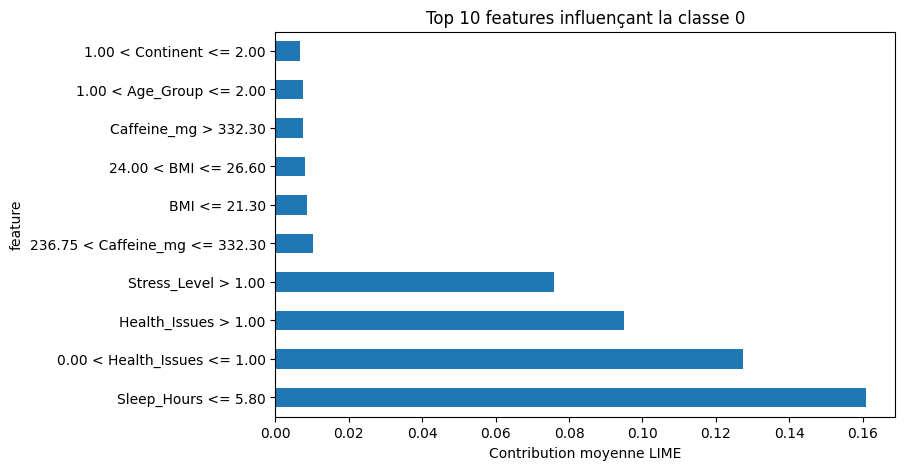

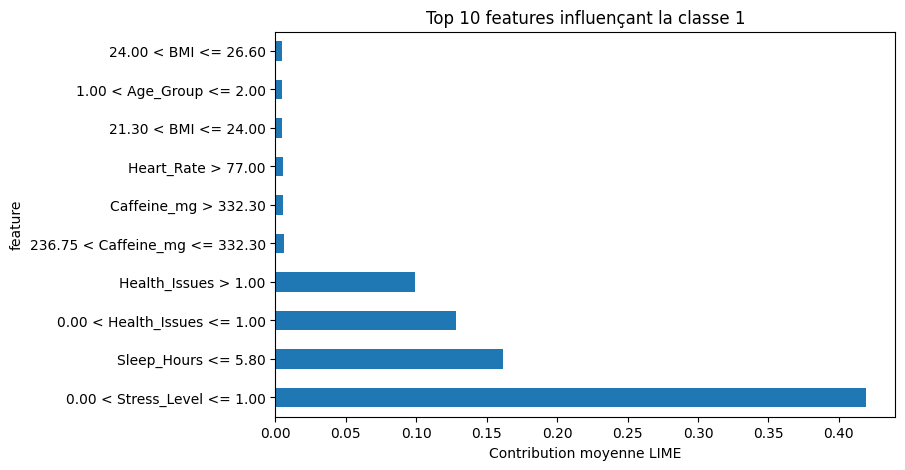

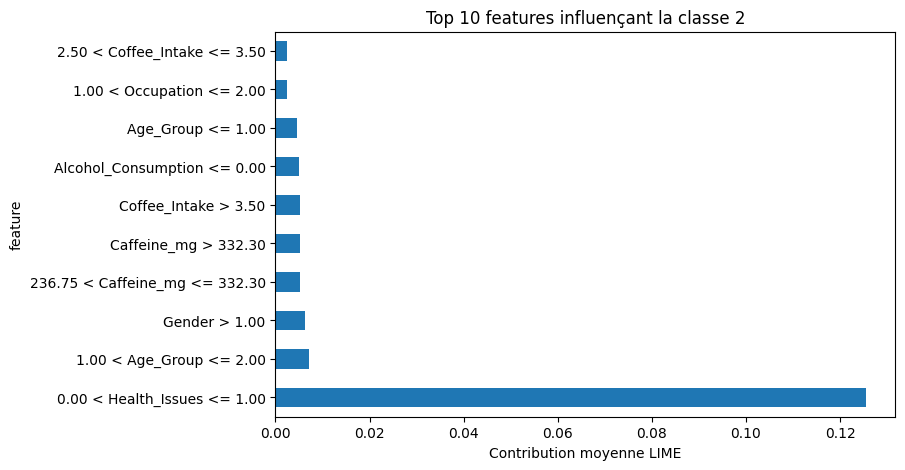

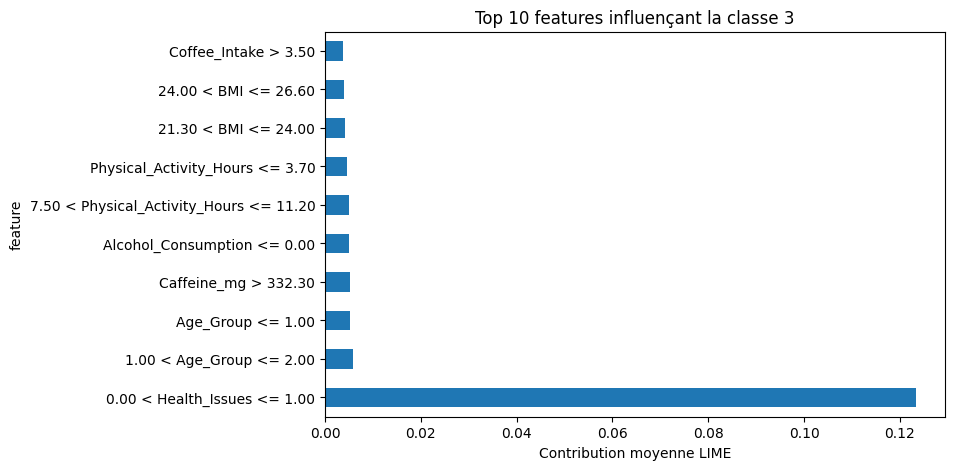

In [15]:
visualisation_lime(lime_0 , 0)
visualisation_lime(lime_1 ,1)
visualisation_lime(lime_2 , 2)
visualisation_lime(lime_3 , 3)